In [1]:

%load_ext autoreload
%autoreload 2


In [4]:

import os; os.chdir(f'{os.environ["MT_ROOT"]}/src/')
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import numpy as np

import constants as ct
import helpers as hp

GROUP = '__dev'
MODEL = 'vaei3d_smth_dev@1.0_1.0_0.01'


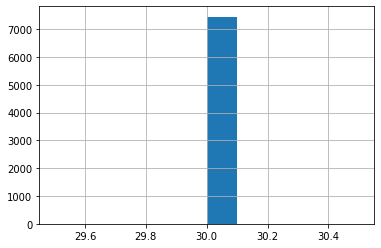

,framerate,height,id,jpeg_path,label,length,placeholders,template,template_id,webm_path,...,top1_conf,top1_pred,top2_conf_1,top2_conf_2,top2_pred_1,top2_pred_2,proj_x1,proj_x2,preds,counts
id,,,,,,,,,,,,,,,,,,,,,
175841,12,240,175841,../data/dummy/smth/jpeg/175841,opening a tin can case of sewing kit,43,[a tin can case of sewing kit],Opening something,10,../data/dummy/smth/webm/175841.webm,...,0.020032,14,0.020032,0.015617,14,29,-12.2858,8.10382,"[0.037049808, 0.012967124, 0.008802462, 0.0039...",30
33002,12,240,33002,../data/dummy/smth/jpeg/33002,opening a pressed powder,37,[a pressed powder],Opening something,10,../data/dummy/smth/webm/33002.webm,...,0.018754,29,0.018754,0.017997,29,27,None,None,"[0.03477623, 0.0026656396, 0.0027524522, 0.001...",30
148735,12,240,148735,../data/dummy/smth/jpeg/148735,opening a small container,43,[a small container],Opening something,10,../data/dummy/smth/webm/148735.webm,...,0.034830,15,0.034830,0.011321,15,27,-30.5496,-47.451,"[0.024458501, 0.0020001966, 0.0024273952, 0.00...",30
28000,12,240,28000,../data/dummy/smth/jpeg/28000,opening a drawer,59,[a drawer],Opening something,10,../data/dummy/smth/webm/28000.webm,...,0.011241,6,0.011241,0.009161,6,19,-17.7464,-29.5946,"[0.024829637, 0.0111294575, 0.007683031, 0.006...",30
12854,12,240,12854,../data/dummy/smth/jpeg/12854,opening a container,57,[a container],Opening something,10,../data/dummy/smth/webm/12854.webm,...,0.011330,28,0.011330,0.009965,28,7,-0.862319,13.6632,"[0.09516448, 0.031532537, 0.02660348, 0.027907...",30
172682,12,240,172682,../data/dummy/smth/jpeg/172682,opening toothpaste cap,39,[toothpaste cap],Opening something,10,../data/dummy/smth/webm/172682.webm,...,0.030508,7,0.030508,0.021151,7,6,56.445,28.098,"[0.041766375, 0.0117416475, 0.005270397, 0.002...",30
56294,12,240,56294,../data/dummy/smth/jpeg/56294,opening health drink bottle,40,[health drink bottle],Opening something,10,../data/dummy/smth/webm/56294.webm,...,0.015181,14,0.015181,0.011343,14,0,None,None,"[0.11342789, 0.021273328, 0.0048023006, 0.0007...",30
60827,12,240,60827,../data/dummy/smth/jpeg/60827,opening a box,22,[a box],Opening something,10,../data/dummy/smth/webm/60827.webm,...,0.028516,14,0.028516,0.012365,14,20,-56.8057,-13.3557,"[0.05808265, 0.0028849996, 0.007188696, 0.0018...",30
97943,12,240,97943,../data/dummy/smth/jpeg/97943,opening a book,72,[a book],Opening something,10,../data/dummy/smth/webm/97943.webm,...,0.027540,4,0.027540,0.019320,4,6,44.64,10.9107,"[0.121462345, 0.005357775, 0.0050585424, 0.001...",30


In [7]:
train_results: pd.DataFrame = hp.read_smth_results(ct.SMTH_RUN_DIR / GROUP / MODEL / 'results_train.tar')
train_results.preds = train_results.preds.map(lambda _x: pkl.loads(_x))
counts = np.array([np.sum(pred > 0) for pred in train_results.preds.values])
train_results = train_results.assign(counts=counts)
train_results.counts.hist()
plt.show()

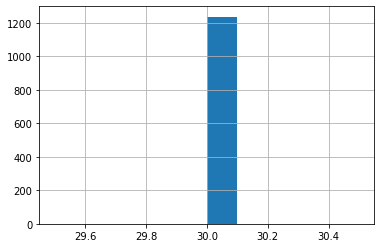

In [9]:

valid_results: pd.DataFrame = hp.read_smth_results(ct.SMTH_RUN_DIR / GROUP / MODEL / 'results_valid.tar')
valid_results.preds = valid_results.preds.map(lambda _x: pkl.loads(_x))
counts = np.array([np.sum(pred > 0) for pred in valid_results.preds.values])
valid_results = valid_results.assign(counts=counts)
valid_results.counts.hist()
plt.show()

In [10]:
sum(train_results.top1_pred.isnull()), sum(valid_results.top1_pred.isnull())

(0, 0)

In [27]:
# preds = np.concatenate(train_results.preds.values.reshape(len(train_results), -1), axis=0)
preds = np.array(train_results.preds.values.tolist())
preds.shape

(7451, 30)